In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
import datetime


In [84]:
data = pd.read_csv('PRECIPITATION/precip_monthly/precip_pentad2022.csv')
data

,system:time_start,precipitation
0,"Jan 1, 2022",24.658
1,"Jan 6, 2022",40.475
2,"Jan 11, 2022",41.398
3,"Jan 16, 2022",115.074
4,"Jan 21, 2022",115.417
...,...,...
67,"Dec 6, 2022",9.779
68,"Dec 11, 2022",26.942
69,"Dec 16, 2022",30.939
70,"Dec 21, 2022",68.570


In [85]:
data.describe()

,precipitation
count,72.000000
mean,20.957667
std,28.487141
min,0.465000
25%,0.870250
50%,5.854000
75%,32.448500
max,115.417000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:time_start  364 non-null    object 
 1   precipitation      364 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


## TEMPERATURE

Text(0, 0.5, 'Temperature(°C)')

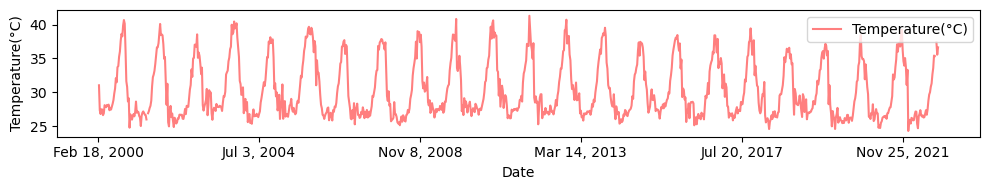

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

path = "Land Surface Temp/lst_yearly/lst_2000_2022.csv"
df = pd.read_csv(path)

df.plot(x='system:time_start', y='LST_Day_1km',color='red', alpha=.5,label = 'Temperature(°C)')
plt.xlabel('Date')
plt.ylabel('Temperature(°C)')

In [125]:
data = pd.read_csv('Land Surface Temp/lst_yearly/lst_2000_2022.csv')
data

,system:time_start,LST_Day_1km
0,"Feb 18, 2000",NaN
1,"Feb 26, 2000",31.057
2,"Mar 5, 2000",27.379
3,"Mar 13, 2000",26.829
4,"Mar 21, 2000",27.529
...,...,...
1040,"Oct 8, 2022",35.351
1041,"Oct 16, 2022",NaN
1042,"Oct 24, 2022",37.373
1043,"Nov 1, 2022",35.563


In [127]:
data.describe()

,LST_Day_1km
count,1042.000000
mean,30.316664
std,4.148194
min,24.340000
25%,26.995250
50%,28.635500
75%,33.560500
max,41.286000


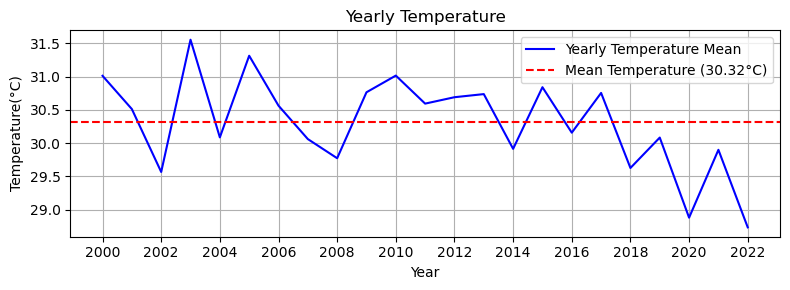

In [239]:
# Replace 'temperature.csv' with the path to your CSV file
df = pd.read_csv('Land Surface Temp/lst_yearly/lst_2000_2022.csv')

# Assuming you have a 'Date' column with date information and a 'Temperature' column with daily temperature values
# Make sure to adjust column names accordingly

# Convert 'Date' column to datetime
df['system:time_start'] = pd.to_datetime(df['system:time_start'])

# Extract year from the 'Date' column
df['Year'] = df['system:time_start'].dt.year

# Calculate the yearly average temperature
yearly_temperature = df.groupby('Year')['LST_Day_1km'].mean()

# Calculate the long-term average temperature
long_term_average = df['LST_Day_1km'].mean()

# Calculate yearly temperature anomalies
yearly_temperature_anomalies = yearly_temperature - long_term_average

# Create a list of years to use for custom x-axis ticks (every 2 years)
years = yearly_rai.index[::2]

plt.figure(figsize=(8, 3))
#plt.plot(yearly_temperature_anomalies.index, yearly_temperature_anomalies.values, label='Yearly Temperature Anomaly', color='red')

plt.plot(yearly_temperature, label='Yearly Temperature Mean', color='blue')
plt.axhline(long_term_average, color='red', linestyle='--', label='Mean Temperature (30.32°C)')
plt.xlabel('Year')
plt.ylabel('Temperature(°C)')
plt.title('Yearly Temperature')
plt.grid(True)
plt.legend()

# Set custom x-axis ticks every 2 years
plt.xticks(years)

plt.tight_layout()
plt.show()


Temperature Monthly

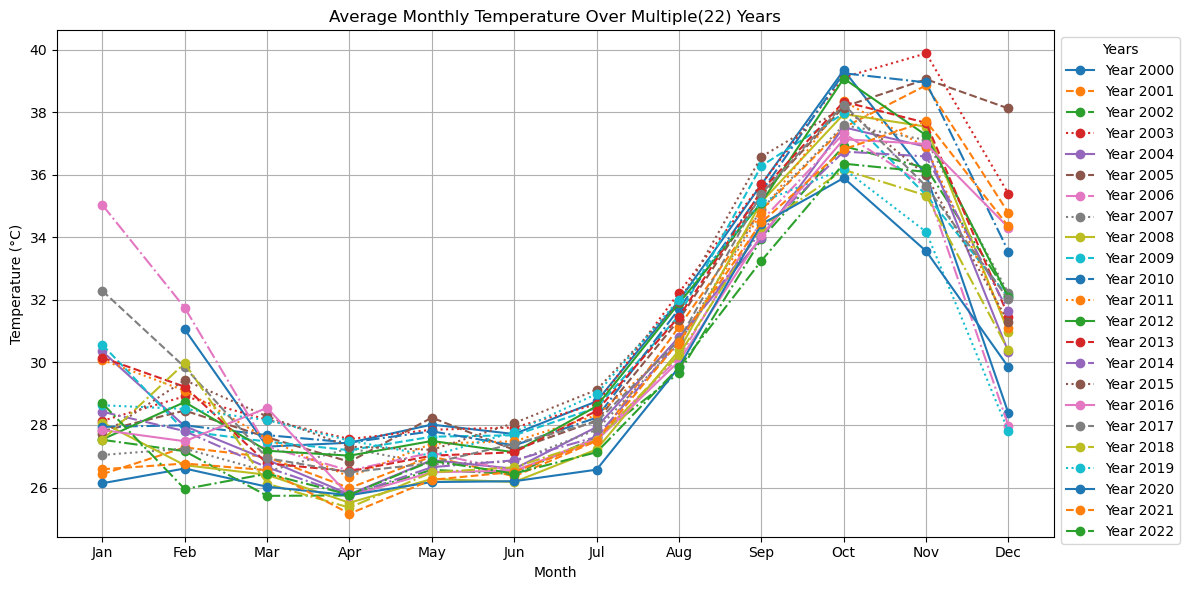

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# Load the CSV file containing daily rainfall data for multiple years
# Replace 'rainfall.csv' with the path to your CSV file
df = pd.read_csv('Land Surface Temp/lst_yearly/lst_2000_2022.csv')

# Convert the 'Date' column to a datetime type
df['system:time_start'] = pd.to_datetime(df['system:time_start'])

# Extract year and month from the 'Date' column
df['Year'] = df['system:time_start'].dt.year
df['Month'] = df['system:time_start'].dt.month

# Calculate monthly average precipitation
monthly_avg_precip = df.groupby(['Year', 'Month'])['LST_Day_1km'].mean().reset_index()

# Create a pivot table to reshape the data for plotting
pivot_table = monthly_avg_precip.pivot(index='Month', columns='Year', values='LST_Day_1km')

# Plotting
plt.figure(figsize=(12, 6))

# Define a set of line styles
line_styles = ['-', '--', '-.', ':']
line_style_cycler = cycle(line_styles)

for year in pivot_table.columns:
    line_style = next(line_style_cycler)
    plt.plot(pivot_table.index, pivot_table[year], marker='o', linestyle=line_style, label=f'Year {year}')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Monthly Temperature Over Multiple(22) Years')
plt.grid(True)

# Set the x-axis ticks to display month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

# Show the legend for years (optional)
plt.legend(title='Years', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Temperature(°C)')

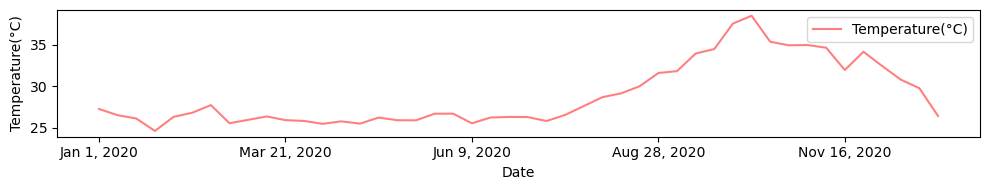

In [113]:
plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

temp = "Land Surface Temp/lst_monthly/lst2020.csv"
df = pd.read_csv(temp)

df.plot(x='system:time_start', y='LST_Day_1km',color='red', alpha=.5, label = 'Temperature(°C)')
plt.xlabel('Date')
plt.ylabel('Temperature(°C)')

In [215]:
df.columns

Index(['system:time_start', 'LST_Day_1km', 'Month', 'Year'], dtype='object')

Monthly Average Temperature Variation

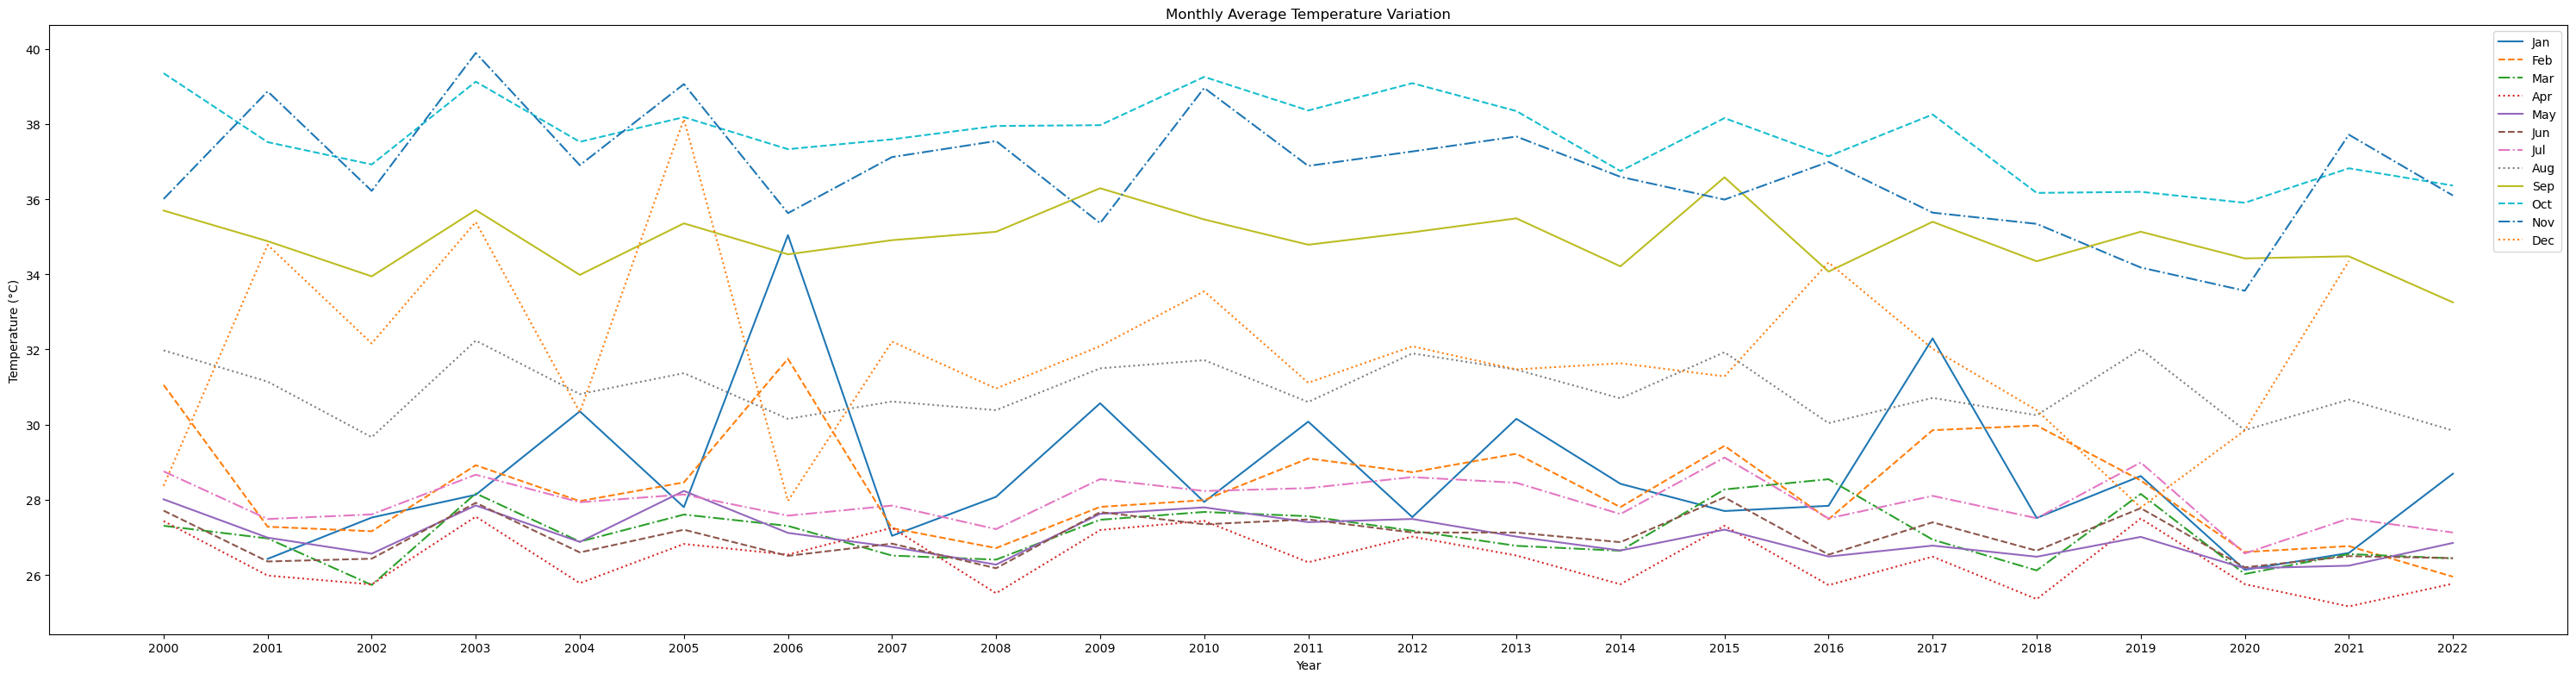

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# Read the CSV file into a DataFrame
csv_file_path = 'Land Surface Temp/lst_yearly/lst_2000_2022.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime type
df['system:time_start'] = pd.to_datetime(df['system:time_start'])

# Extract year and month from the 'Date' column
df['Year'] = df['system:time_start'].dt.year
df['Month'] = df['system:time_start'].dt.month

# Group data by year and month, calculate the monthly average temperature
monthly_average_temperature = df.groupby(['Year', 'Month'])['LST_Day_1km'].mean().reset_index()

# Define month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Define a set of line styles
line_styles = ['-', '--', '-.', ':']
line_style_cycler = cycle(line_styles)

# Plotting
plt.figure(figsize=(30, 8))

for month in range(1, 13):
    monthly_data = monthly_average_temperature[monthly_average_temperature['Month'] == month]
    line_style = next(line_style_cycler)
    plt.plot(monthly_data['Year'], monthly_data['LST_Day_1km'], label=f'{month_names[month - 1]}', linestyle=line_style)

plt.title('Monthly Average Temperature Variation')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Set custom tick labels for the x-axis
plt.xticks(range(monthly_average_temperature['Year'].min(), monthly_average_temperature['Year'].max() + 1), rotation=0)

plt.legend()
plt.tight_layout()
plt.show()


In [277]:
import pandas as pd

# Load the CSV file containing daily temperature data
# Replace 'temperature_data.csv' with the path to your CSV file
df = pd.read_csv('Land Surface Temp/lst_yearly/lst_2000_2022.csv')

# Convert the 'Date' column to datetime format with the correct format
df['system:time_start'] = pd.to_datetime(df['system:time_start'], format='%b %d, %Y')  # Format based on your date format

# Extract year and month from the 'Date' column
df['Year'] = df['system:time_start'].dt.year
df['Month'] = df['system:time_start'].dt.strftime('%b')  # Abbreviated month names (Jan, Feb, ...)

# Calculate monthly average temperature for each year and month
monthly_avg_temperatures = df.groupby(['Year', 'Month'])['LST_Day_1km'].mean().unstack()

# Round the average temperatures to 2 decimal places
monthly_avg_temperatures = monthly_avg_temperatures.round(2)

# Rename columns to full month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg_temperatures.columns = month_names

# Export the table as a CSV file
monthly_avg_temperatures.to_csv('Land Surface Temp/lst_monthly/monthly_avg_temperatures.csv')

# Display the resulting table
print(monthly_avg_temperatures)

plt.show()


        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
Year                                                                         
2000  27.43  31.98  28.37  31.06    NaN  28.76  27.71  27.31  28.01  36.00   
2001  25.98  31.14  34.78  27.28  26.43  27.49  26.36  26.97  26.99  38.87   
2002  25.75  29.66  32.16  27.16  27.53  27.61  26.43  25.73  26.57  36.22   
2003  27.55  32.24  35.39  28.92  28.13  28.67  27.92  28.17  27.85  39.89   
2004  25.78  30.81  30.33  27.96  30.35  27.93  26.60  26.89  26.88  36.90   
2005  26.82  31.37  38.13  28.46  27.80  28.14  27.20  27.61  28.24  39.06   
2006  26.54  30.15  27.97  31.75  35.04  27.58  26.51  27.30  27.12  35.63   
2007  27.25  30.62  32.21  27.24  27.04  27.84  26.83  26.51  26.75  37.12   
2008  25.51  30.38  30.96  26.71  28.08  27.22  26.18  26.41  26.27  37.55   
2009  27.19  31.50  32.09  27.81  30.57  28.55  27.67  27.47  27.63  35.36   
2010  27.44  31.72  33.55  27.99  27.94  28.23  27.35  27.68  27

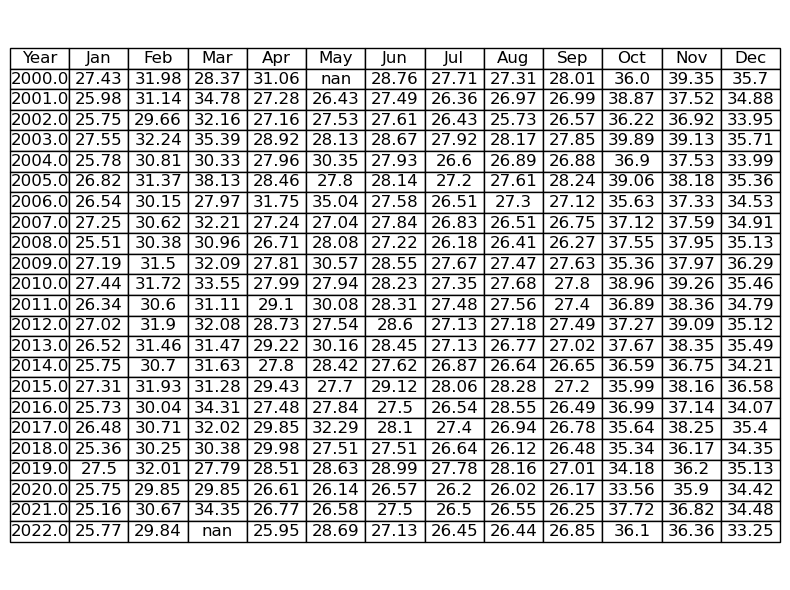

In [278]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
# Replace 'your_data.csv' with the path to your CSV file
df = pd.read_csv('Land Surface Temp/lst_monthly/monthly_avg_temperatures.csv')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Hide the axes
ax.axis('off')

# Create a table visualization and add it to the axis
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Set the cell font size
table.auto_set_font_size(False)
table.set_fontsize(12)

# Save the table as a PNG image
# Replace 'table.png' with the desired output image filename
plt.savefig('table.png', bbox_inches='tight', pad_inches=0.2, dpi=300)

# Show the table
plt.show()


## PRECIPITATION

Text(0, 0.5, 'Rainfall(mm)')

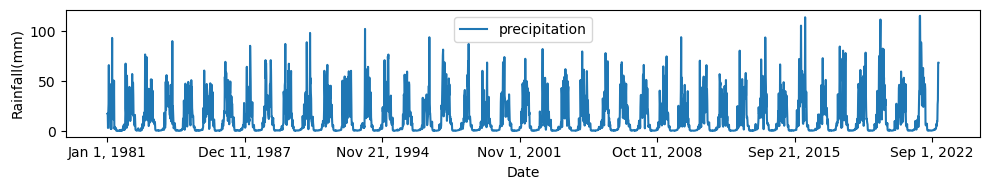

In [168]:
plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

path = "PRECIPITATION/precip_yearly/precip_1982_2022.csv"
df = pd.read_csv(path)

df.plot(x='system:time_start', y='precipitation')
plt.xlabel('Date')
plt.ylabel('Rainfall(mm)')

In [173]:
data = pd.read_csv('PRECIPITATION/precip_yearly/precip_1982_2022.csv')
data.describe

# Convert the 'Date' column to datetime
df['system:time_start'] = pd.to_datetime(df['system:time_start'])

# Extract the year from the 'Date' column
df['Year'] = df['system:time_start'].dt.year

# Calculate yearly total precipitation
yearly_precipitation = df.groupby('Year')['precipitation'].sum()

# Calculate the long-term average precipitation
long_term_average = df['precipitation'].mean()

In [186]:
#yearly_precipitation
#yearly_precipitation.describe()
yearly_precipitation.median()
yearly_precipitation.mean()

1003.4794523809525

Text(0, 0.5, 'Rainfall(mm)')

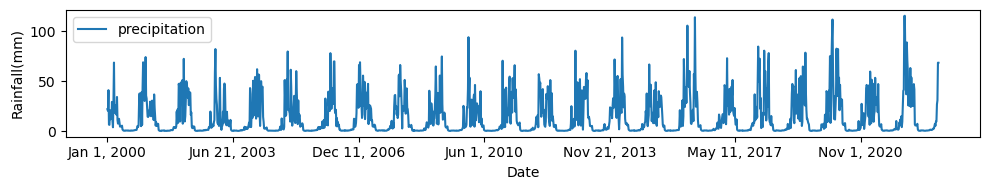

In [92]:
plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

path = "PRECIPITATION/precip_yearly/precip_2000_2022.csv"
df = pd.read_csv(path)

df.plot(x='system:time_start', y='precipitation')
plt.xlabel('Date')
plt.ylabel('Rainfall(mm)')

Precipitation Anomaly

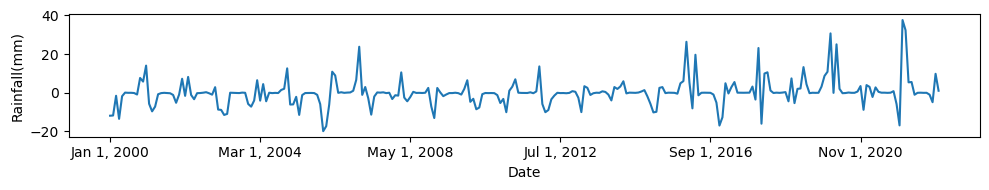

In [265]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
path = "PRECIPITATION/precip_yearly/precip_anomaly.csv"
df = pd.read_csv(path)

# Create a figure and axis with custom size and layout
plt.figure(figsize=[10, 2])
plt.rcParams["figure.autolayout"] = True
ax = plt.gca()

# Plot the data
df.plot(x='date', y='precipitation', ax=ax)

# Customize the x-axis and y-axis labels
plt.xlabel('Date')
plt.ylabel('Rainfall(mm)')

# Remove the legend from the graph
plt.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [234]:
data = pd.read_csv('PRECIPITATION/precip_yearly/precip_2000_2022.csv')
data
data.describe()

,precipitation
count,1656.000000
mean,14.066545
std,18.854992
min,0.331000
25%,0.843750
50%,5.190500
75%,21.199250
max,115.417000


In [235]:
data = pd.read_csv('/Users/rugi/Documents/Google Earth Engine/EE Output/PRECIPITATION/precip_monthly/precip_daily2022.csv')
data
data.describe()

,precipitation
count,364.000000
mean,4.130920
std,6.862147
min,0.000000
25%,0.018000
50%,0.557000
75%,5.462500
max,36.001000


In [263]:
data

,system:time_start,precipitation
0,"Jan 1, 2022",6.876
1,"Jan 2, 2022",4.880
2,"Jan 3, 2022",6.544
3,"Jan 4, 2022",3.121
4,"Jan 5, 2022",0.815
...,...,...
359,"Dec 26, 2022",27.571
360,"Dec 27, 2022",15.004
361,"Dec 28, 2022",13.400
362,"Dec 29, 2022",7.834


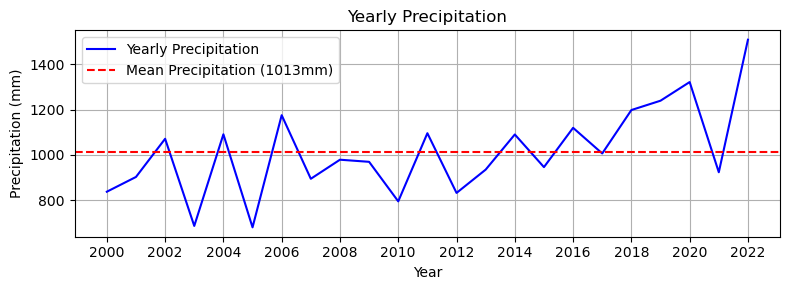

In [241]:


# Load the CSV data into a DataFrame
# Replace 'precipitation.csv' with the path to your CSV file
df = pd.read_csv('PRECIPITATION/precip_yearly/precip_2000_2022.csv')

# Assuming you have a 'Date' column with date information
# and a 'Precipitation' column with daily precipitation values
# Make sure to adjust column names accordingly

# Convert the 'Date' column to datetime
df['system:time_start'] = pd.to_datetime(df['system:time_start'])

# Extract the year from the 'Date' column
df['Year'] = df['system:time_start'].dt.year

# Calculate the yearly total precipitation
yearly_precipitation = df.groupby('Year')['precipitation'].sum()

# Calculate the long-term average precipitation
longterm_average = df['precipitation'].mean()
#longterm_average = df['precipitation'].median()

# Calculate yearly precipitation anomalies
yearly_precipitation_anomalies = yearly_precipitation - longterm_average

# Create a list of years to use for custom x-axis ticks (every 2 years)
years = yearly_rai.index[::2]

# Plot the Yearly Precipitation Anomalies with a Mean Line
plt.figure(figsize=(8, 3))

#plt.plot(yearly_precipitation_anomalies.index, yearly_precipitation_anomalies.values, label='Yearly Precipitation Anomaly', color='blue')
plt.plot(yearly_precipitation, label='Yearly Precipitation', color='blue')

#plt.axhline(longterm_average, color='red', linestyle='--', label='Mean Precipitation')
plt.axhline(1012.8, color='red', linestyle='--', label='Mean Precipitation (1013mm)')

plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Yearly Precipitation')
plt.grid(True)
plt.legend()

# Set custom x-axis ticks every 2 years
plt.xticks(years)
plt.tight_layout()
plt.show()





In [165]:
yearly_precipitation.describe()


count      23.000000
mean     1012.791261
std       198.243781
min       679.646000
25%       898.309000
50%       978.565000
75%      1107.592000
max      1508.952000
Name: precipitation, dtype: float64

In [167]:
yearly_precipitation.median()

978.565

Precipitation Monthly

Text(0, 0.5, 'Rainfall(mm)')

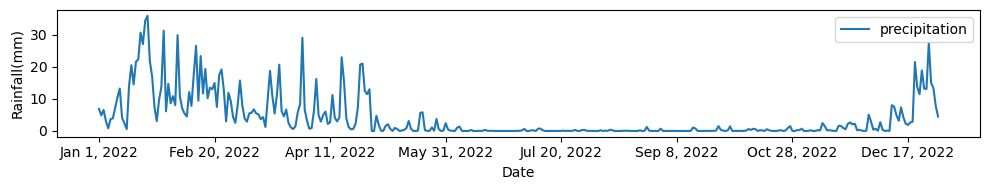

In [ ]:
plt.xlabel('Date')
plt.ylabel('Rainfall(mm)')

Text(0.5, 1.0, '')

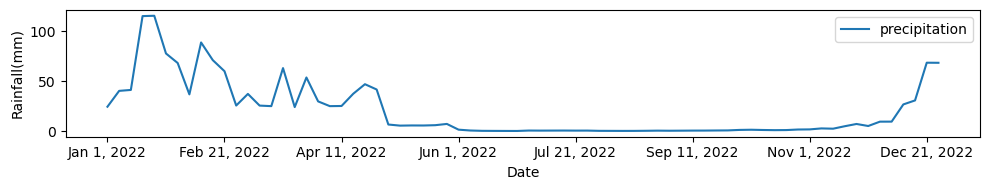

In [106]:
plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

rain = "PRECIPITATION/precip_monthly/precip_pentad2022.csv"
df = pd.read_csv(rain)

df.plot(x='system:time_start', y='precipitation')

plt.xlabel('Date')
plt.ylabel('Rainfall(mm)')
plt.title("")


Monthly Average Rainfall Variation

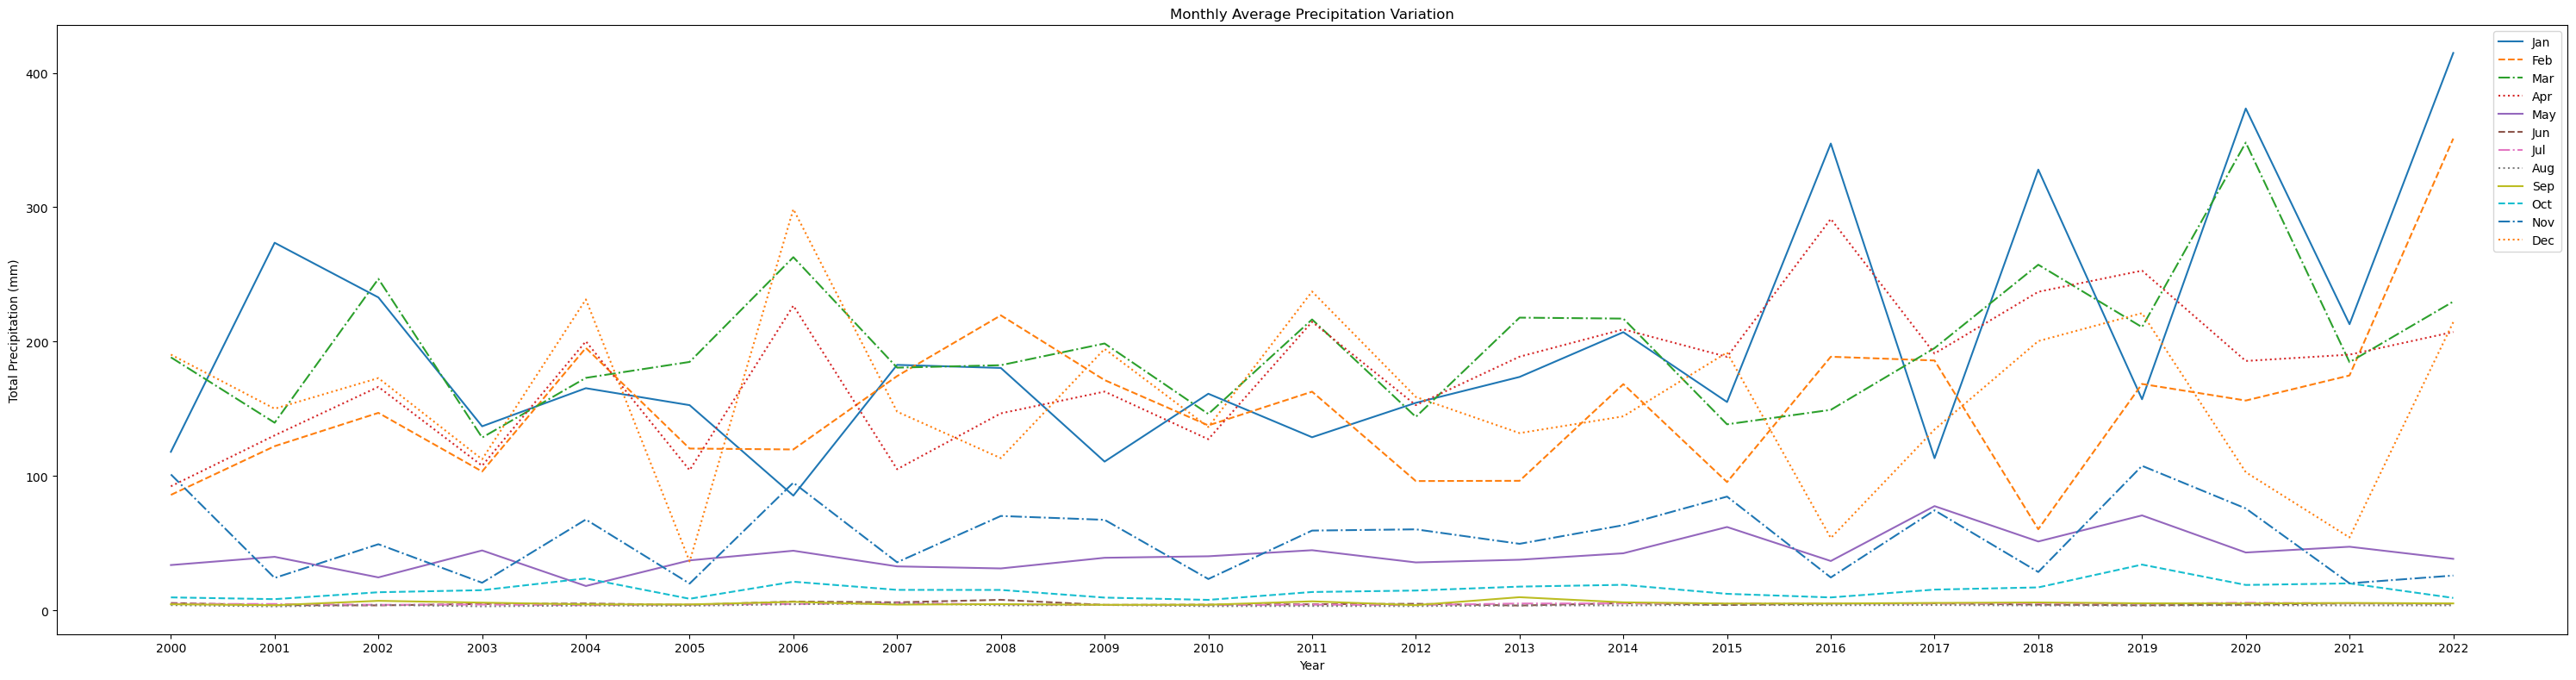

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# Read the CSV file into a DataFrame
csv_file_path = 'PRECIPITATION/precip_yearly/precip_2000_2022.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime type
df['system:time_start'] = pd.to_datetime(df['system:time_start'])

# Group data by year and month and calculate the total rainfall
df['Year'] = df['system:time_start'].dt.year
df['Month'] = df['system:time_start'].dt.month
seasonal_rainfall = df.groupby(['Year', 'Month'])['precipitation'].sum().reset_index()

# Define month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Define a set of line styles
line_styles = ['-', '--', '-.', ':']
line_style_cycler = cycle(line_styles)

# Plotting
plt.figure(figsize=(30, 8))
for month in range(1, 13):
    monthly_data = seasonal_rainfall[seasonal_rainfall['Month'] == month]
    line_style = next(line_style_cycler)
    plt.plot(monthly_data['Year'], monthly_data['precipitation'], label=f'{month_names[month - 1]}', linestyle=line_style)

plt.title('Monthly Average Precipitation Variation')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')

# Set custom tick labels for the x-axis
plt.xticks(range(seasonal_rainfall['Year'].min(), seasonal_rainfall['Year'].max() + 1), rotation=0)

plt.legend()
plt.tight_layout()
plt.show()


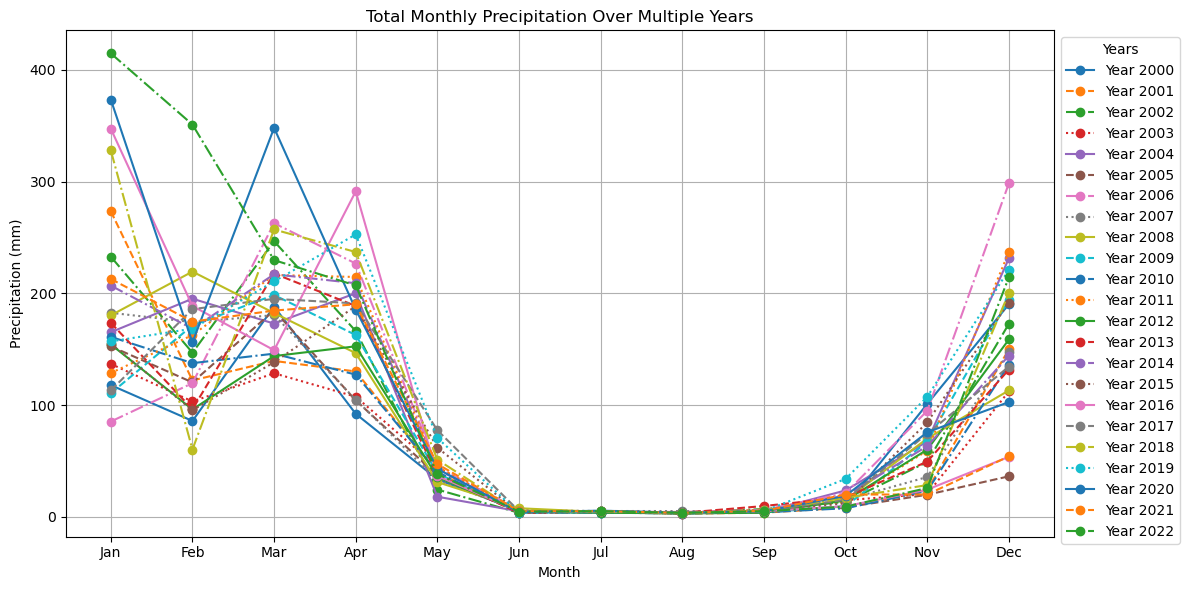

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# Load the CSV file containing daily rainfall data for multiple years
# Replace 'rainfall.csv' with the path to your CSV file
df = pd.read_csv('PRECIPITATION/precip_yearly/precip_2000_2022.csv')

# Convert the 'Date' column to a datetime type
df['system:time_start'] = pd.to_datetime(df['system:time_start'])

# Extract year and month from the 'Date' column
df['Year'] = df['system:time_start'].dt.year
df['Month'] = df['system:time_start'].dt.month

# Calculate monthly average precipitation
monthly_avg_precip = df.groupby(['Year', 'Month'])['precipitation'].sum().reset_index()

# Create a pivot table to reshape the data for plotting
pivot_table = monthly_avg_precip.pivot(index='Month', columns='Year', values='precipitation')

# Plotting
plt.figure(figsize=(12, 6))

# Define a set of line styles
line_styles = ['-', '--', '-.', ':']
line_style_cycler = cycle(line_styles)

for year in pivot_table.columns:
    line_style = next(line_style_cycler)
    plt.plot(pivot_table.index, pivot_table[year], marker='o', linestyle=line_style, label=f'Year {year}')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.title('Total Monthly Precipitation Over Multiple Years')
plt.grid(True)

# Set the x-axis ticks to display month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

# Show the legend for years (optional)
plt.legend(title='Years', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [286]:
import pandas as pd

# Load the CSV file containing daily temperature data

df = pd.read_csv('PRECIPITATION/precip_yearly/precip_2000_2022.csv')

# Convert the 'Date' column to datetime format with the correct format
df['system:time_start'] = pd.to_datetime(df['system:time_start'], format='%b %d, %Y')  # Format based on your date format

# Extract year and month from the 'Date' column
df['Year'] = df['system:time_start'].dt.year
df['Month'] = df['system:time_start'].dt.strftime('%b')  # Abbreviated month names (Jan, Feb, ...)

# Calculate monthly sum precipitation for each year and month
monthly_sum_precip = df.groupby(['Year', 'Month'])['precipitation'].sum().unstack()

# Round the sum precipitation to 2 decimal places
monthly_sum_precip = monthly_sum_precip.round(2)

# Rename columns to full month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sum_precip.columns = month_names

# Export the table as a CSV file
#monthly_sum_precip.to_csv('PRECIPITATION/precip_monthly/monthly_sum_precipitation.csv')

# Display the resulting table
print(monthly_sum_precip)

plt.show()


         Jan   Feb     Mar     Apr     May   Jun   Jul     Aug    Sep     Oct  \
Year                                                                            
2000   92.23  3.77  190.30   85.85  117.92  4.69  5.38  188.26  33.64  101.07   
2001  130.13  2.84  149.99  122.11  273.53  4.64  3.78  139.57  39.75   24.03   
2002  166.26  4.00  172.81  146.92  232.85  4.01  3.61  246.66  24.44   49.14   
2003  107.54  2.89  112.36  103.27  136.92  4.23  4.64  128.51  44.50   20.45   
2004  200.16  3.50  231.36  195.24  165.27  3.76  5.02  172.96  18.03   67.53   
2005  104.24  3.32   36.29  120.35  152.64  4.23  3.99  184.83  37.10   19.83   
2006  226.73  4.42  298.56  119.68   85.32  4.63  6.48  262.80  44.29   94.94   
2007  104.96  5.21  147.80  174.30  182.63  5.26  5.89  180.57  32.64   35.69   
2008  146.55  3.58  113.19  219.50  180.35  4.37  7.74  182.39  31.11   70.16   
2009  162.74  3.93  194.50  171.31  110.63  3.88  3.93  198.56  39.04   67.29   
2010  127.29  3.00  136.34  

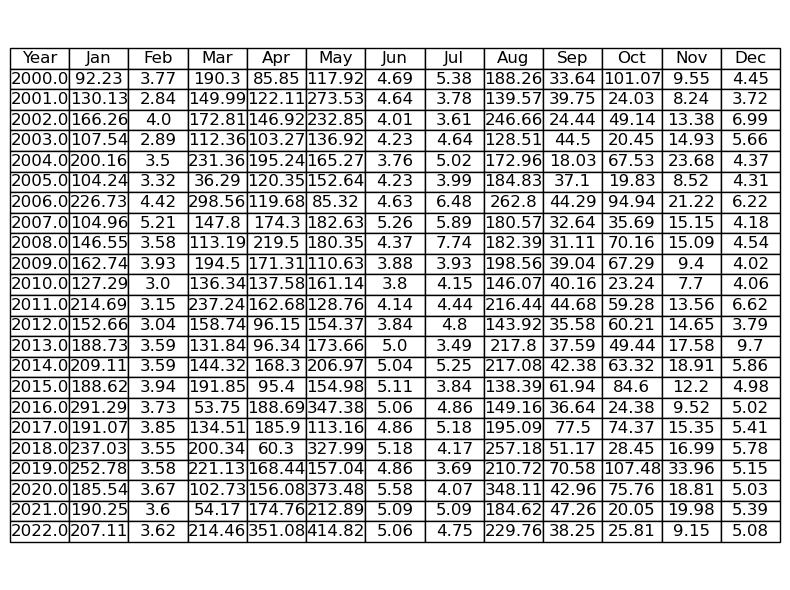

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
# Replace 'your_data.csv' with the path to your CSV file
df = pd.read_csv('PRECIPITATION/precip_monthly/monthly_sum_precipitation.csv')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Hide the axes
ax.axis('off')

# Create a table visualization and add it to the axis
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Set the cell font size
table.auto_set_font_size(False)
table.set_fontsize(12)

# Save the table as a PNG image
# Replace 'table.png' with the desired output image filename
plt.savefig('table.png', bbox_inches='tight', pad_inches=0.2, dpi=300)

# Show the table
plt.show()

## NDVI

Long Term NDVI

Text(0, 0.5, 'NDVI')

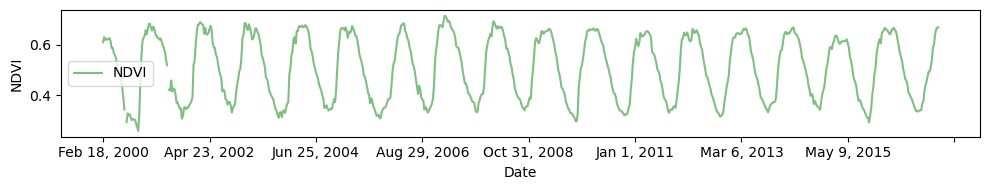

In [94]:
plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

ndvi = "NDVI/ndvi_yearly/ndvi_2000_2017.csv"
df = pd.read_csv(ndvi)

df.plot(x='system:time_start', y='00000000000000000000',color='green', alpha=.5, label = 'NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI')

NDVI Monthly

Text(0, 0.5, 'NDVI')

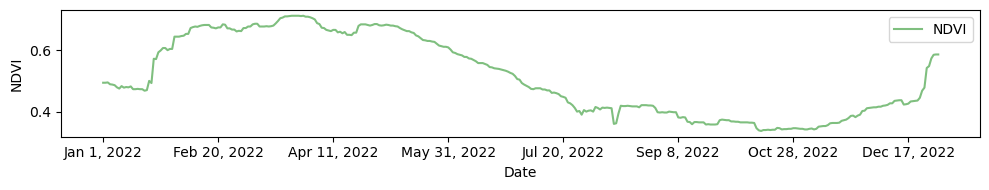

In [115]:
plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

ndvi = "NDVI/ndvi_monthly/ndvi_2022.csv"
df = pd.read_csv(ndvi)

df.plot(x='system:time_start', y='00000000000000000000',color='green', alpha=.5, label = 'NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI')

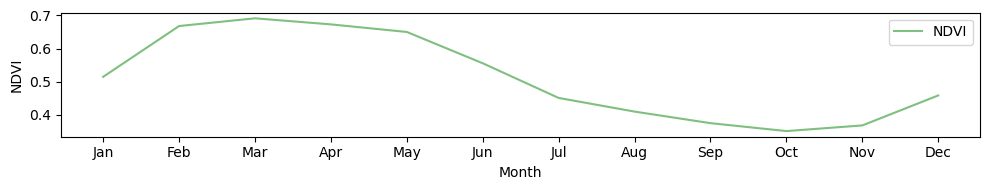

In [288]:
import pandas as pd
import matplotlib.pyplot as plt

# Load NDVI data from CSV
ndvi = "NDVI/ndvi_monthly/ndvi_2022.csv"
df = pd.read_csv(ndvi)

# Assuming you have a 'system:time_start' column with date information in datetime format
# Extract the month and year from the 'system:time_start' column
df['system:time_start'] = pd.to_datetime(df['system:time_start'])
df['Month'] = df['system:time_start'].dt.month
df['Year'] = df['system:time_start'].dt.year

# Group data by month and calculate the mean NDVI for each month
monthly_ndvi = df.groupby(['Year', 'Month'])['00000000000000000000'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 2))
plt.plot(monthly_ndvi['Month'], monthly_ndvi['00000000000000000000'], color='green', alpha=0.5, label='NDVI')
plt.xlabel('Month')
plt.ylabel('NDVI')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()


In [290]:
df.describe()

,00000000000000000000,00000000000000000001,00000000000000000002,Month,Year
count,364.000000,352.000000,351.000000,364.000000,364.0
mean,0.512940,0.566875,0.557376,6.510989,2022.0
std,0.127881,0.126150,0.137666,3.445345,0.0
min,0.337000,0.372000,0.347000,1.000000,2022.0
25%,0.398750,0.426000,0.391000,4.000000,2022.0
50%,0.479000,0.599500,0.600000,7.000000,2022.0
75%,0.657250,0.685000,0.688000,9.250000,2022.0
max,0.712000,0.728000,0.764000,12.000000,2022.0


## NDWI

NDWI Monthly

Text(0, 0.5, 'NDWI')

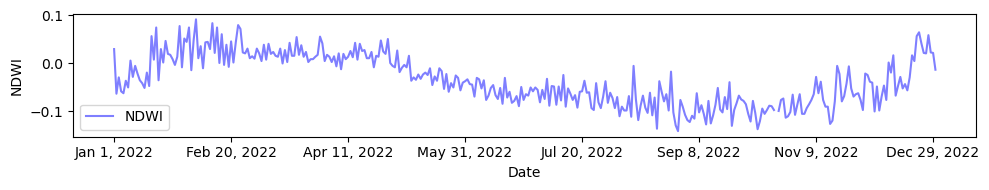

In [116]:
plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

ndwi = "NDWI/ndwi_monthly/ndwi2022.csv"
df = pd.read_csv(ndwi)

df.plot(x='system:time_start', y='00000000000000000000',color='blue', alpha=.5, label = 'NDWI')
plt.xlabel('Date')
plt.ylabel('NDWI')

NDWI Longterm

<Axes: xlabel='system:time_start'>

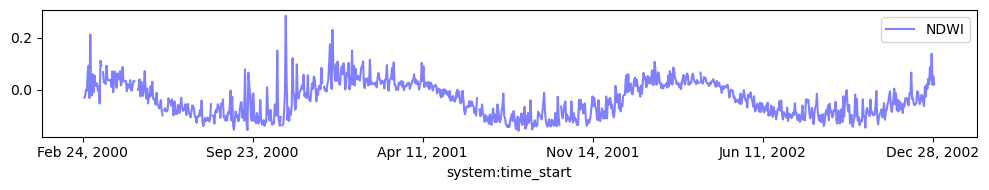

In [3]:
plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

ndwi = "NDWI/ndwi_yearly/ndwi_2000_2022.csv"
df = pd.read_csv(ndwi)

df.plot(x='system:time_start', y='00000000000000000000',color='blue', alpha=.5, label = 'NDWI')

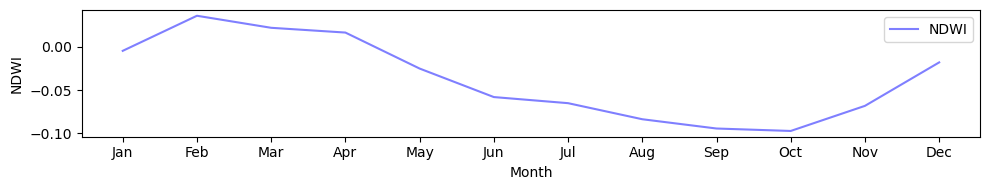

In [291]:
import pandas as pd
import matplotlib.pyplot as plt

# Load NDVI data from CSV
ndvi = "NDWI/ndwi_monthly/ndwi2022.csv"
df = pd.read_csv(ndvi)

# Assuming you have a 'system:time_start' column with date information in datetime format
# Extract the month and year from the 'system:time_start' column
df['system:time_start'] = pd.to_datetime(df['system:time_start'])
df['Month'] = df['system:time_start'].dt.month
df['Year'] = df['system:time_start'].dt.year

# Group data by month and calculate the mean NDVI for each month
monthly_ndvi = df.groupby(['Year', 'Month'])['00000000000000000000'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 2))
plt.plot(monthly_ndvi['Month'], monthly_ndvi['00000000000000000000'], color='blue', alpha=0.5, label='NDWI')
plt.xlabel('Month')
plt.ylabel('NDWI')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()


In [292]:
df.describe()

,00000000000000000000,00000000000000000001,00000000000000000002,Month,Year
count,351.000000,306.000000,306.000000,352.000000,352.0
mean,-0.034997,-0.072392,-0.076647,6.392045,2022.0
std,0.051981,0.074889,0.080437,3.441782,0.0
min,-0.141000,-0.183000,-0.196000,1.000000,2022.0
25%,-0.076000,-0.137000,-0.146750,3.000000,2022.0
50%,-0.040000,-0.081000,-0.083500,6.000000,2022.0
75%,0.010500,-0.023250,-0.016000,9.000000,2022.0
max,0.092000,0.171000,0.172000,12.000000,2022.0


MULTILINE GRAPHS

NDVI & NDWI

##THERMO-PLUVIOMETREIC RERLATIONSHIP

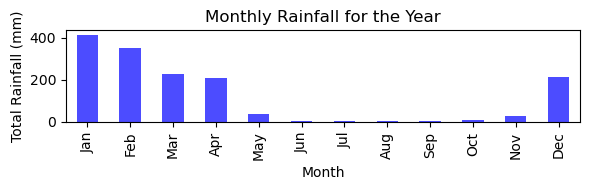

In [353]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV dataframe of daily rainfall
df = pd.read_csv('PRECIPITATION/precip_monthly/precip_daily2022.csv')  # Replace with your CSV file path
temperature_df = pd.read_csv("Land Surface Temp/lst_monthly/lst2022.csv")

# Assuming you have a 'Date' column with date information
# Make sure to adjust column names accordingly

# Convert the 'Date' column to datetime
df['system:time_start'] = pd.to_datetime(df['system:time_start'])

# Extract the month from the 'Date' column
df['Month'] = df['system:time_start'].dt.month

# Group data by month and calculate the total monthly rainfall
monthly_rainfall = df.groupby('Month')['precipitation'].sum()

# Create a bar graph for monthly rainfall
plt.figure(figsize=(6, 2))

# Plot temperature on the first y-axis new
ax1.plot(temperature_df['system:time_start'], temperature_df['LST_Day_1km'], color='tab:red', label='Temperature (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')









monthly_rainfall.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.title('Monthly Rainfall for the Year')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


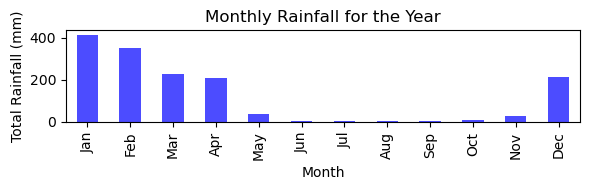

In [351]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV dataframe of daily rainfall
df = pd.read_csv('PRECIPITATION/precip_monthly/precip_pentad2022.csv')  # Replace with your CSV file path


# Assuming you have a 'Date' column with date information
# Make sure to adjust column names accordingly

# Convert the 'Date' column to datetime
df['system:time_start'] = pd.to_datetime(df['system:time_start'])

# Extract the month from the 'Date' column
df['Month'] = df['system:time_start'].dt.month

# Group data by month and calculate the total monthly rainfall
monthly_rainfall = df.groupby('Month')['precipitation'].sum()

# Create a bar graph for monthly rainfall
plt.figure(figsize=(6, 2))
monthly_rainfall.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.title('Monthly Rainfall for the Year')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


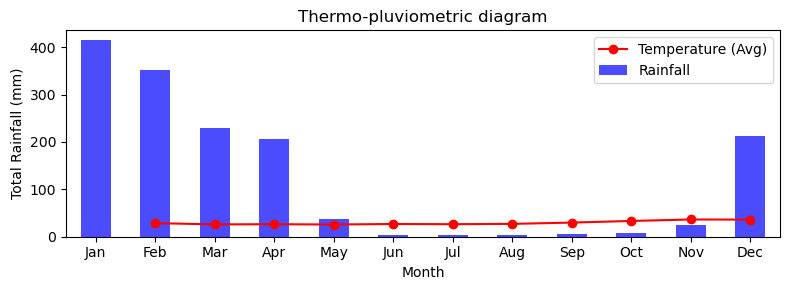

In [352]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV dataframe of daily rainfall
rainfall_df = pd.read_csv('PRECIPITATION/precip_monthly/precip_daily2022.csv')  # Replace with your CSV file path for rainfall
temperature_df = pd.read_csv('Land Surface Temp/lst_monthly/lst2022.csv')  # Replace with your CSV file path for temperature

# Assuming you have 'Date' and corresponding columns 'Rainfall' and 'Temperature'
# Make sure to adjust column names accordingly

# Convert the 'Date' column to datetime in both dataframes
rainfall_df['system:time_start'] = pd.to_datetime(rainfall_df['system:time_start'])
temperature_df['system:time_start'] = pd.to_datetime(temperature_df['system:time_start'])

# Extract the month from the 'Date' column in both dataframes
rainfall_df['Month'] = rainfall_df['system:time_start'].dt.month
temperature_df['Month'] = temperature_df['system:time_start'].dt.month

# Group data by month and calculate the total monthly rainfall
monthly_rainfall = rainfall_df.groupby('Month')['precipitation'].sum()

# Create a bar graph for monthly rainfall
plt.figure(figsize=(8, 3))
monthly_rainfall.plot(kind='bar', color='blue', alpha=0.7, label='Rainfall')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')

# Add a line plot for monthly temperature
monthly_temperature = temperature_df.groupby('Month')['LST_Day_1km'].mean()
monthly_temperature.plot(kind='line', color='red', marker='o', label='Temperature (Avg)')


plt.title('Thermo-pluviometric diagram')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()


**Anomalies Analysis of Soil Moisture and Precipitation Over a River Basin**

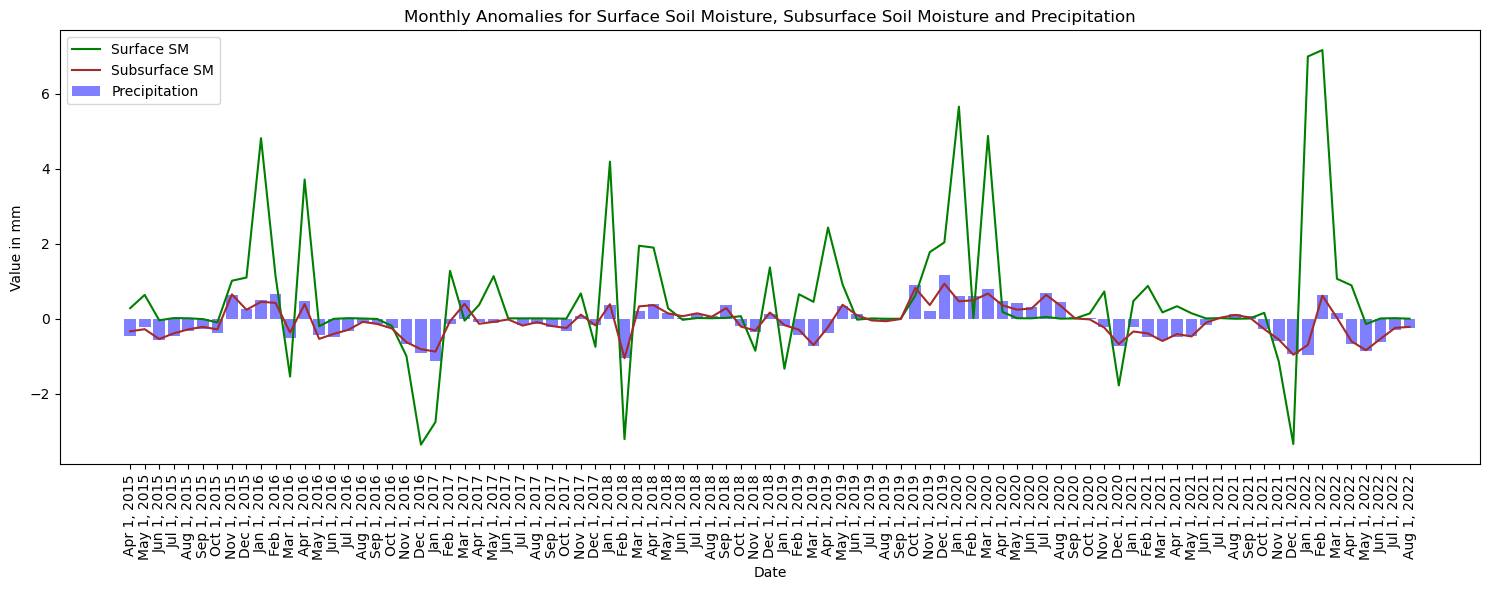

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file (replace 'your_data.csv' with your CSV file path).
df = pd.read_csv('Anomalies in Soil Moisture and Precipitation/soil_moisture_precip_anomaly.csv')

# Create the plot.
plt.figure(figsize=(15, 6))  # Set the figure size.

# Plot 'Surface SM' as a blue line.
plt.plot(df['system:time_start'], df['surface SM'], label='Surface SM', color='green')

# Plot 'Subsurface SM' as a green line.
plt.plot(df['system:time_start'], df['subsurface SM'], label='Subsurface SM', color='brown')

# Plot 'Precipitation' as red bars.
plt.bar(df['system:time_start'], df['precipitation'], label='Precipitation', color='blue', alpha=0.5)

# Add labels and legend.
plt.xlabel('Date')
plt.ylabel('Value in mm')
plt.title('Monthly Anomalies for Surface Soil Moisture, Subsurface Soil Moisture and Precipitation')
plt.legend()

# Rotate x-axis labels for better readability (optional).
plt.xticks(rotation=90)

# Show the plot.
plt.tight_layout()
plt.show()


In [379]:
data = pd.read_csv('Anomalies in Soil Moisture and Precipitation/anomalies-chart.csv')
data
data.describe()

,surface SM,subsurface SM,precipitation
count,78.000000,78.000000,78.000000
mean,0.377308,-0.044321,-0.046179
std,1.301884,0.397668,0.449552
min,-2.172000,-1.052000,-1.123000
25%,-0.166750,-0.292500,-0.351250
50%,0.016500,-0.075000,-0.099000
75%,0.754750,0.264500,0.240250
max,5.470000,0.933000,1.164000


In [383]:
data

,system:time_start,surface SM,subsurface SM,precipitation
0,"Apr 1, 2015",-0.190,-0.336,-0.458
1,"May 1, 2015",0.605,-0.279,-0.222
2,"Jun 1, 2015",-0.178,-0.541,-0.575
3,"Jul 1, 2015",0.117,-0.390,-0.457
4,"Aug 1, 2015",0.007,-0.284,-0.332
...,...,...,...,...
73,"May 1, 2021",-0.497,-0.473,-0.453
74,"Jun 1, 2021",-0.125,-0.104,-0.162
75,"Jul 1, 2021",0.034,0.028,0.025
76,"Aug 1, 2021",-0.076,0.101,0.119
